# 4.10 Coding Etiquette & Excel Reporting - Pt 1, Steps 6 - 8

## This script contains the following points:

### Import data and libraries
### Step 6 - Create a customer profile bar chart
### Step 7 - Aggregate variables on customer-profile level
### Step 8 - Customer profiles by region

## 1. Import data and libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Assign project folder path to a variable

path = r'C:\Users\jomok\Documents\Career Foundry\Achievement 4\07-2023 Instacart Basket Analysis'

In [3]:
# Import data

df_final_subset = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_subset_sample.pkl'))

In [4]:
# Check output

df_final_subset.head()

,gender,state,age,number_of_dependents,marital_status,income,order_number,loyalty_flag,spending_flag,order_frequency_flag,...,busiest_period_of_day,region,department,age_group,income_group,dependents_group,customer_profile,customer_income_profile,time_period,day
1,Female,Missouri,48,3,married,165665,7,New customer,Low spender,Regular customer,...,Most orders,Midwest,beverages,Old Adults,Upper Income,Parent,Married older parent,Upper income married older parent,Between 8am and 5pm,Thursday
7,Female,Missouri,48,3,married,165665,7,New customer,Low spender,Regular customer,...,Most orders,Midwest,dairy eggs,Old Adults,Upper Income,Parent,Married older parent,Upper income married older parent,Between 8am and 5pm,Thursday
9,Female,Missouri,48,3,married,165665,1,New customer,Low spender,Regular customer,...,Most orders,Midwest,produce,Old Adults,Upper Income,Parent,Married older parent,Upper income married older parent,Between 8am and 5pm,Monday
13,Female,Missouri,48,3,married,165665,6,New customer,Low spender,Regular customer,...,Average orders,Midwest,produce,Old Adults,Upper Income,Parent,Married older parent,Upper income married older parent,Between 8am and 5pm,Sunday
14,Female,Missouri,48,3,married,165665,7,New customer,Low spender,Regular customer,...,Most orders,Midwest,produce,Old Adults,Upper Income,Parent,Married older parent,Upper income married older parent,Between 8am and 5pm,Thursday


In [5]:
# Check shape

df_final_subset.shape

(9717028, 27)

## Step 6 - Create a customer profile bar chart

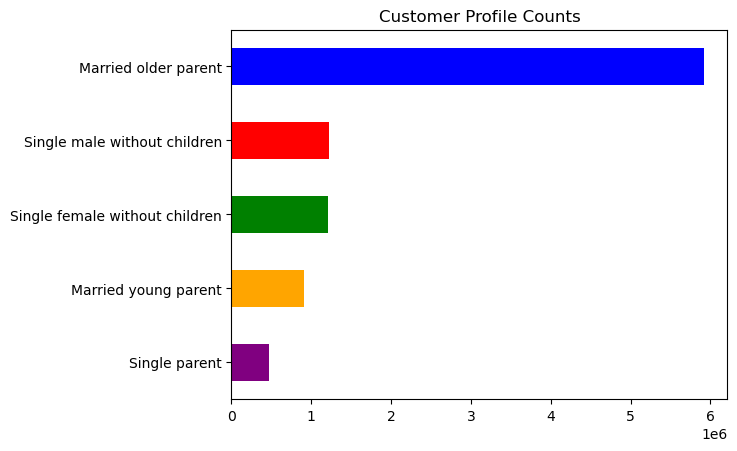

In [6]:
# Create a bar chart from the "customer_profile" column

bar = df_final_subset['customer_profile'].value_counts().sort_values(ascending=True).plot.barh(color = ['purple', 'orange', 'green', 'red', 'blue'], title = 'Customer Profile Counts' )

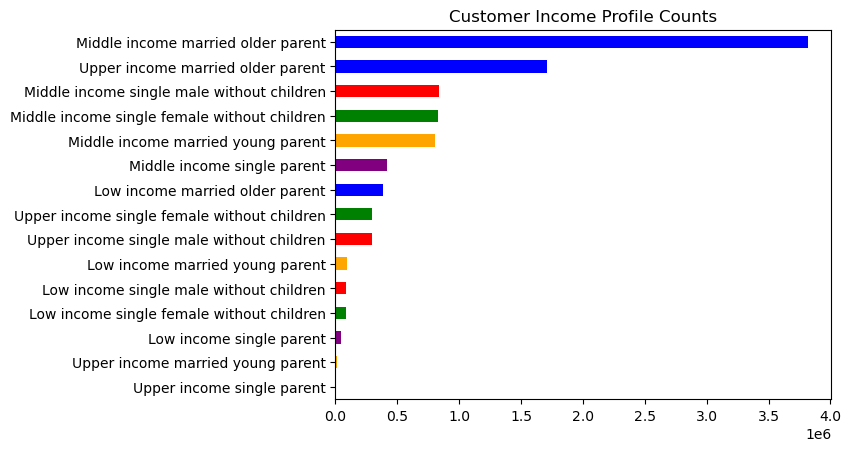

In [7]:
# Create bar chart
bar_cust_inc_prof = df_final_subset['customer_income_profile'].value_counts().sort_values(ascending=True).plot.barh(color = ['purple','orange','purple', 'green','red', 'orange', 'red', 'green', 'blue', 'purple','orange','green','red','blue', 'blue'], title = 'Customer Income Profile Counts' )

Observations:  Married older parent group, by far, constitutes the largest customer group

In [8]:
# Check frequency 

df_final_subset['customer_profile'].value_counts(dropna=False)

Married older parent              5917638
Single male without children      1217809
Single female without children    1209569
Married young parent               907443
Single parent                      464569
Name: customer_profile, dtype: int64

No married without children data

## Step 7 - Aggregate variables on customer-profile level

In [9]:
# Aggregate customer profile by prices

df_final_subset.groupby('customer_profile').agg({'prices':['min', 'mean', 'max']})

prices                
                                  min      mean   max
customer_profile                                     
Married older parent              1.0  7.793898  25.0
Married young parent              1.0  7.776837  25.0
Single female without children    1.0  7.794251  25.0
Single male without children      1.0  7.787480  25.0
Single parent                     1.0  7.798780  25.0

In [10]:
# Aggregate customer profile by orders

df_final_subset.groupby('customer_profile').agg({'order_number':['min', 'mean', 'max']})

order_number               
                                        min       mean max
customer_profile                                          
Married older parent                      1  17.087479  99
Married young parent                      1  17.082134  99
Single female without children            1  17.392441  99
Single male without children              1  17.143386  99
Single parent                             1  17.279302  99

In [11]:
crosstab = pd.crosstab(df_final_subset['order_number'], df_final_subset['customer_profile'], dropna=False)

In [12]:
crosstab.head()

customer_profile,Married older parent,Married young parent,Single female without children,Single male without children,Single parent
order_number,,,,,
1,379881,58260,77252,77872,29691
2,375158,57365,76371,76764,29212
3,376516,56700,75485,77028,29030
4,331749,50845,67483,69151,26249
5,297247,45642,60296,61373,23303


In [13]:
crosstab.shape

(99, 5)

In [14]:
grouped = df_final_subset.groupby('customer_profile').agg({'order_number':['sum']})

In [15]:
grouped.head()

,order_number
,sum
customer_profile,
Married older parent,101117513
Married young parent,15501063
Single female without children,21037357
Single male without children,20877370
Single parent,8027428


In [16]:
# Aggregate customer income profile by prices

df_final_subset.groupby('customer_income_profile').agg({'prices':['min', 'mean', 'max']})

prices                
                                                min      mean   max
customer_income_profile                                            
Low income married older parent                 1.0  6.542714  25.0
Low income married young parent                 1.0  6.625262  25.0
Low income single female without children       1.0  6.552668  25.0
Low income single male without children         1.0  6.568310  25.0
Low income single parent                        1.0  6.604757  25.0
Middle income married older parent              1.0  7.845922  25.0
Middle income married young parent              1.0  7.908218  25.0
Middle income single female without children    1.0  7.869560  25.0
Middle income single male without children      1.0  7.858020  25.0
Middle income single parent                     1.0  7.920564  25.0
Upper income married older parent               1.0  7.961818  25.0
Upper income married young parent               1.0  7.775813  25.0
Upper income single female without children     1.0  7.948757  25.0
Upper income single male without children       1.0  7.948286  25.0
Upper income single parent                      1.0  7.929569  25.0

## Step 8 - Customer profiles by region

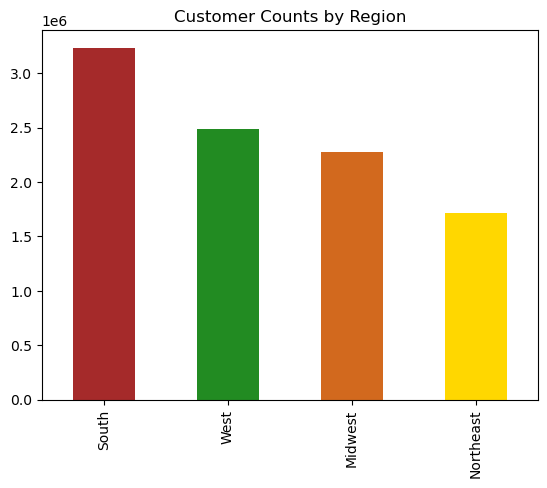

In [17]:
# Create a bar chart from the "region" column

bar_region = df_final_subset['region'].value_counts().plot.bar(title = 'Customer Counts by Region', color = ['brown', 'forestgreen', 'chocolate', 'gold'])

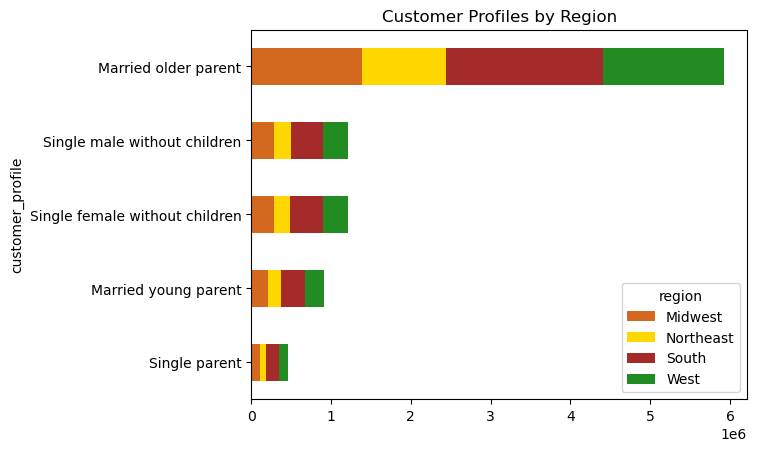

In [18]:
# Group customer profile and regions

cust_prof_region = df_final_subset.groupby(['customer_profile', 'region']).size().unstack()

# Sort

cust_prof_region = cust_prof_region.loc[cust_prof_region.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

cust_prof_region_bar = cust_prof_region.plot.barh(stacked = True, title = 'Customer Profiles by Region', color = ['chocolate','gold','brown', 'forestgreen'])

In [19]:
# Create customer profile and region crosstab

crosstab_profile_region = pd.crosstab(df_final_subset['customer_profile'], df_final_subset['region'], dropna=False)
crosstab_profile_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Married older parent,1384156,1052875,1965314,1515293
Married young parent,213112,157639,301616,235076
Single female without children,283857,208294,411325,306093
Single male without children,286841,217195,397939,315834
Single parent,110091,80422,158444,115612


In [20]:
# Create customer income profile and region crosstab

crosstab_inc_profile_region = pd.crosstab(df_final_subset['customer_income_profile'], df_final_subset['region'], dropna=False)
crosstab_inc_profile_region

region,Midwest,Northeast,South,West
customer_income_profile,,,,
Low income married older parent,88908,70185,130918,98430
Low income married young parent,21877,15793,32139,22007
Low income single female without children,18542,14874,29917,23439
Low income single male without children,20198,16346,28573,21964
Low income single parent,10153,7611,14201,11063
Middle income married older parent,885946,676297,1272816,981397
Middle income married young parent,188691,140205,265966,210048
Middle income single female without children,197534,143282,279812,209274
Middle income single male without children,196736,149460,274915,216739


Across all customer profiles, the region with the highest frequency of orders is the South and the region with the lowest frequency of orders is the Northeast.  

Across all regions, the customer profile with the highest frequency is the Married older parent and Middle income married older parent profile, which unexpectedly has a higher order frequency than the Upper income married older parent profile; and the customer profile with the lowest frequency is the Single parent and the Upper income single parent profile, which surprisingly, has a lower order frequency than the Low income single parent group in all regions.